# Quick Start
Install using ``pip`` and then import and use one of the tracking readers. This example
loads a local file.tcx. From the data file, we obviously get time, altitude, distance, heart rate  and geo position (lat/long).


In [53]:
# !pip install runpandas
import runpandas as rpd
activity = rpd.read_file('./sample.tcx')

In [54]:
activity.head(5)

,alt,dist,hr,lon,lat
time,,,,,
00:00:00,178.942627,0.000000,62.0,-79.093187,35.951880
00:00:01,178.942627,0.000000,62.0,-79.093184,35.951880
00:00:06,178.942627,1.106947,62.0,-79.093172,35.951868
00:00:12,177.500610,13.003035,62.0,-79.093228,35.951774
00:00:16,177.500610,22.405027,60.0,-79.093141,35.951732


The data frames that are returned by runpandas when
loading files is similar for different file types.
The dataframe in the above example is a subclass of the
``pandas.DataFrame`` and provides some additional features.
Certain columns also return specific ``pandas.Series`` subclasses,
which provides useful methods:

In [55]:
print (type(activity))
print(type(activity.alt))

<class 'runpandas.types.frame.Activity'>
<class 'runpandas.types.columns.Altitude'>


For instance, if you want to get the base unit for the altitude ``alt`` data or the distance ``dist`` data:

In [56]:
print(activity.alt.base_unit)
print(activity.alt.sum())

m
65883.68151855901


In [57]:
print(activity.dist.base_unit)
print(activity.dist[-1])

m
4686.31103516


The `Activity` dataframe also contains special properties that presents some statistics from the workout such as elapsed time, the moving time and the distance of workout in meters.

In [58]:
#total time elapsed for the activity
print(activity.ellapsed_time)
#distance of workout in meters
print(activity.distance)

0 days 00:33:11
4686.31103516


Occasionally, some observations such as speed, distance and others must be calculated based on available data in the given activity. In runpandas there are  special accessors (`runpandas.acessors`) that computes some of these metrics.  We will compute the `speed` and the `distance per position` observations using the latitude and longitude for each record and calculate the haversine distance in meters and the speed in meters per second.

In [59]:
#compute the distance using haversine formula between two consecutive latitude, longitudes observations.
activity['distpos']  = activity.compute.distance()
activity['distpos'].head()

time
00:00:00          NaN
00:00:01     0.333146
00:00:06     1.678792
00:00:12    11.639901
00:00:16     9.183847
Name: distpos, dtype: float64

In [60]:
#compute the distance using haversine formula between two consecutive latitude, longitudes observations.
activity['speed']  = activity.compute.speed(from_distances=True)
activity['speed'].head()

time
00:00:00         NaN
00:00:01    0.333146
00:00:06    0.335758
00:00:12    1.939984
00:00:16    2.295962
Name: speed, dtype: float64

Sporadically, there will be a large time difference between consecutive observations in the same workout. This can happen  when device is paused by the athlete or therere proprietary algorithms controlling the operating sampling rate of the device which can auto-pause when the device detects no significant change in position.  In runpandas there is an algorithm that will attempt to calculate the moving time based on the GPS locations, distances, and speed of the activity.

To compute the moving time, there is a special acessor that detects the periods of inactivity and returns the `moving` series containing all the observations considered to be stopped.

In [61]:
activity_only_moving = activity.only_moving()
print(activity_only_moving['moving'].head())

time
00:00:00    False
00:00:01    False
00:00:06    False
00:00:12     True
00:00:16     True
Name: moving, dtype: bool


Now we can compute the moving time, the time of how long the user were active.

In [62]:
activity_only_moving.moving_time

Timedelta('0 days 00:33:05')

Now let's play with the data. Let's show distance vs as an example of what and how we can create visualizations.  In this example, we will use the built in, matplotlib based plot function.

Matplotlib is building the font cache; this may take a moment.


<AxesSubplot:xlabel='time'>

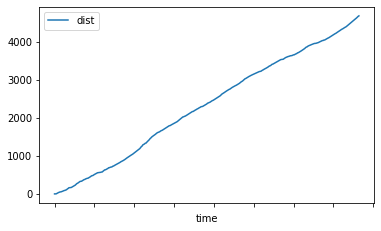

In [10]:
activity[['dist']].plot()

And here is altitude versus time.

<AxesSubplot:xlabel='time'>

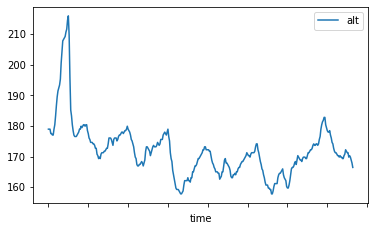

In [11]:
activity[['alt']].plot()

Finally, lest's show the altitude vs distance profile. Here is a scatterplot that shows altitude vs distance as recorded.

<AxesSubplot:xlabel='dist', ylabel='alt'>

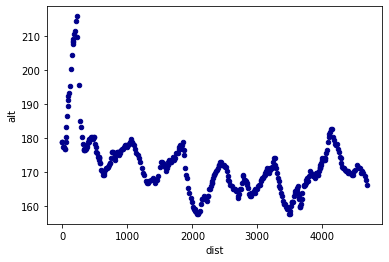

In [12]:
activity.plot.scatter(x='dist', y='alt', c='DarkBlue')

Finally, let's watch a  glimpse of the map route by plotting a 2d map using logintude vs latitude.

<AxesSubplot:xlabel='lon'>

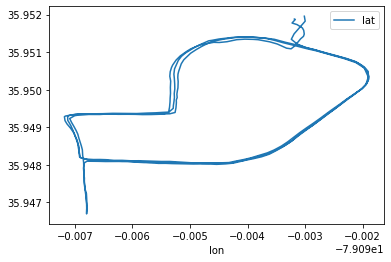

In [13]:
activity.plot(x='lon', y='lat')

Ok, a 2D map is cool. But would it be possible plot the route above on Google Maps ?   For this task, we will use a ready-made package called [gmplot](https://github.com/gmplot/gmplot). It uses the Google Maps API together with its Python library.

In [26]:
import gmplot

#let's get the min/max latitude and longitudes
min_lat, max_lat, min_lon, max_lon = \
min(activity['lat']), max(activity['lat']), \
min(activity['lon']), max(activity['lon'])

## Create empty map with zoom level 16
mymap = gmplot.GoogleMapPlotter(
    min_lat + (max_lat - min_lat) / 2, 
    min_lon + (max_lon - min_lon) / 2, 
    16, apikey='yourapikey')
#To plot the data as a continuous line (or a polygon), we can use the plot method. It has two self-explanatory optional arguments: color and edge width.
mymap.plot(activity['lat'], activity['lon'], 'blue', edge_width=1)

#Draw the map to an HTML file.
mymap.draw('myroute.html')

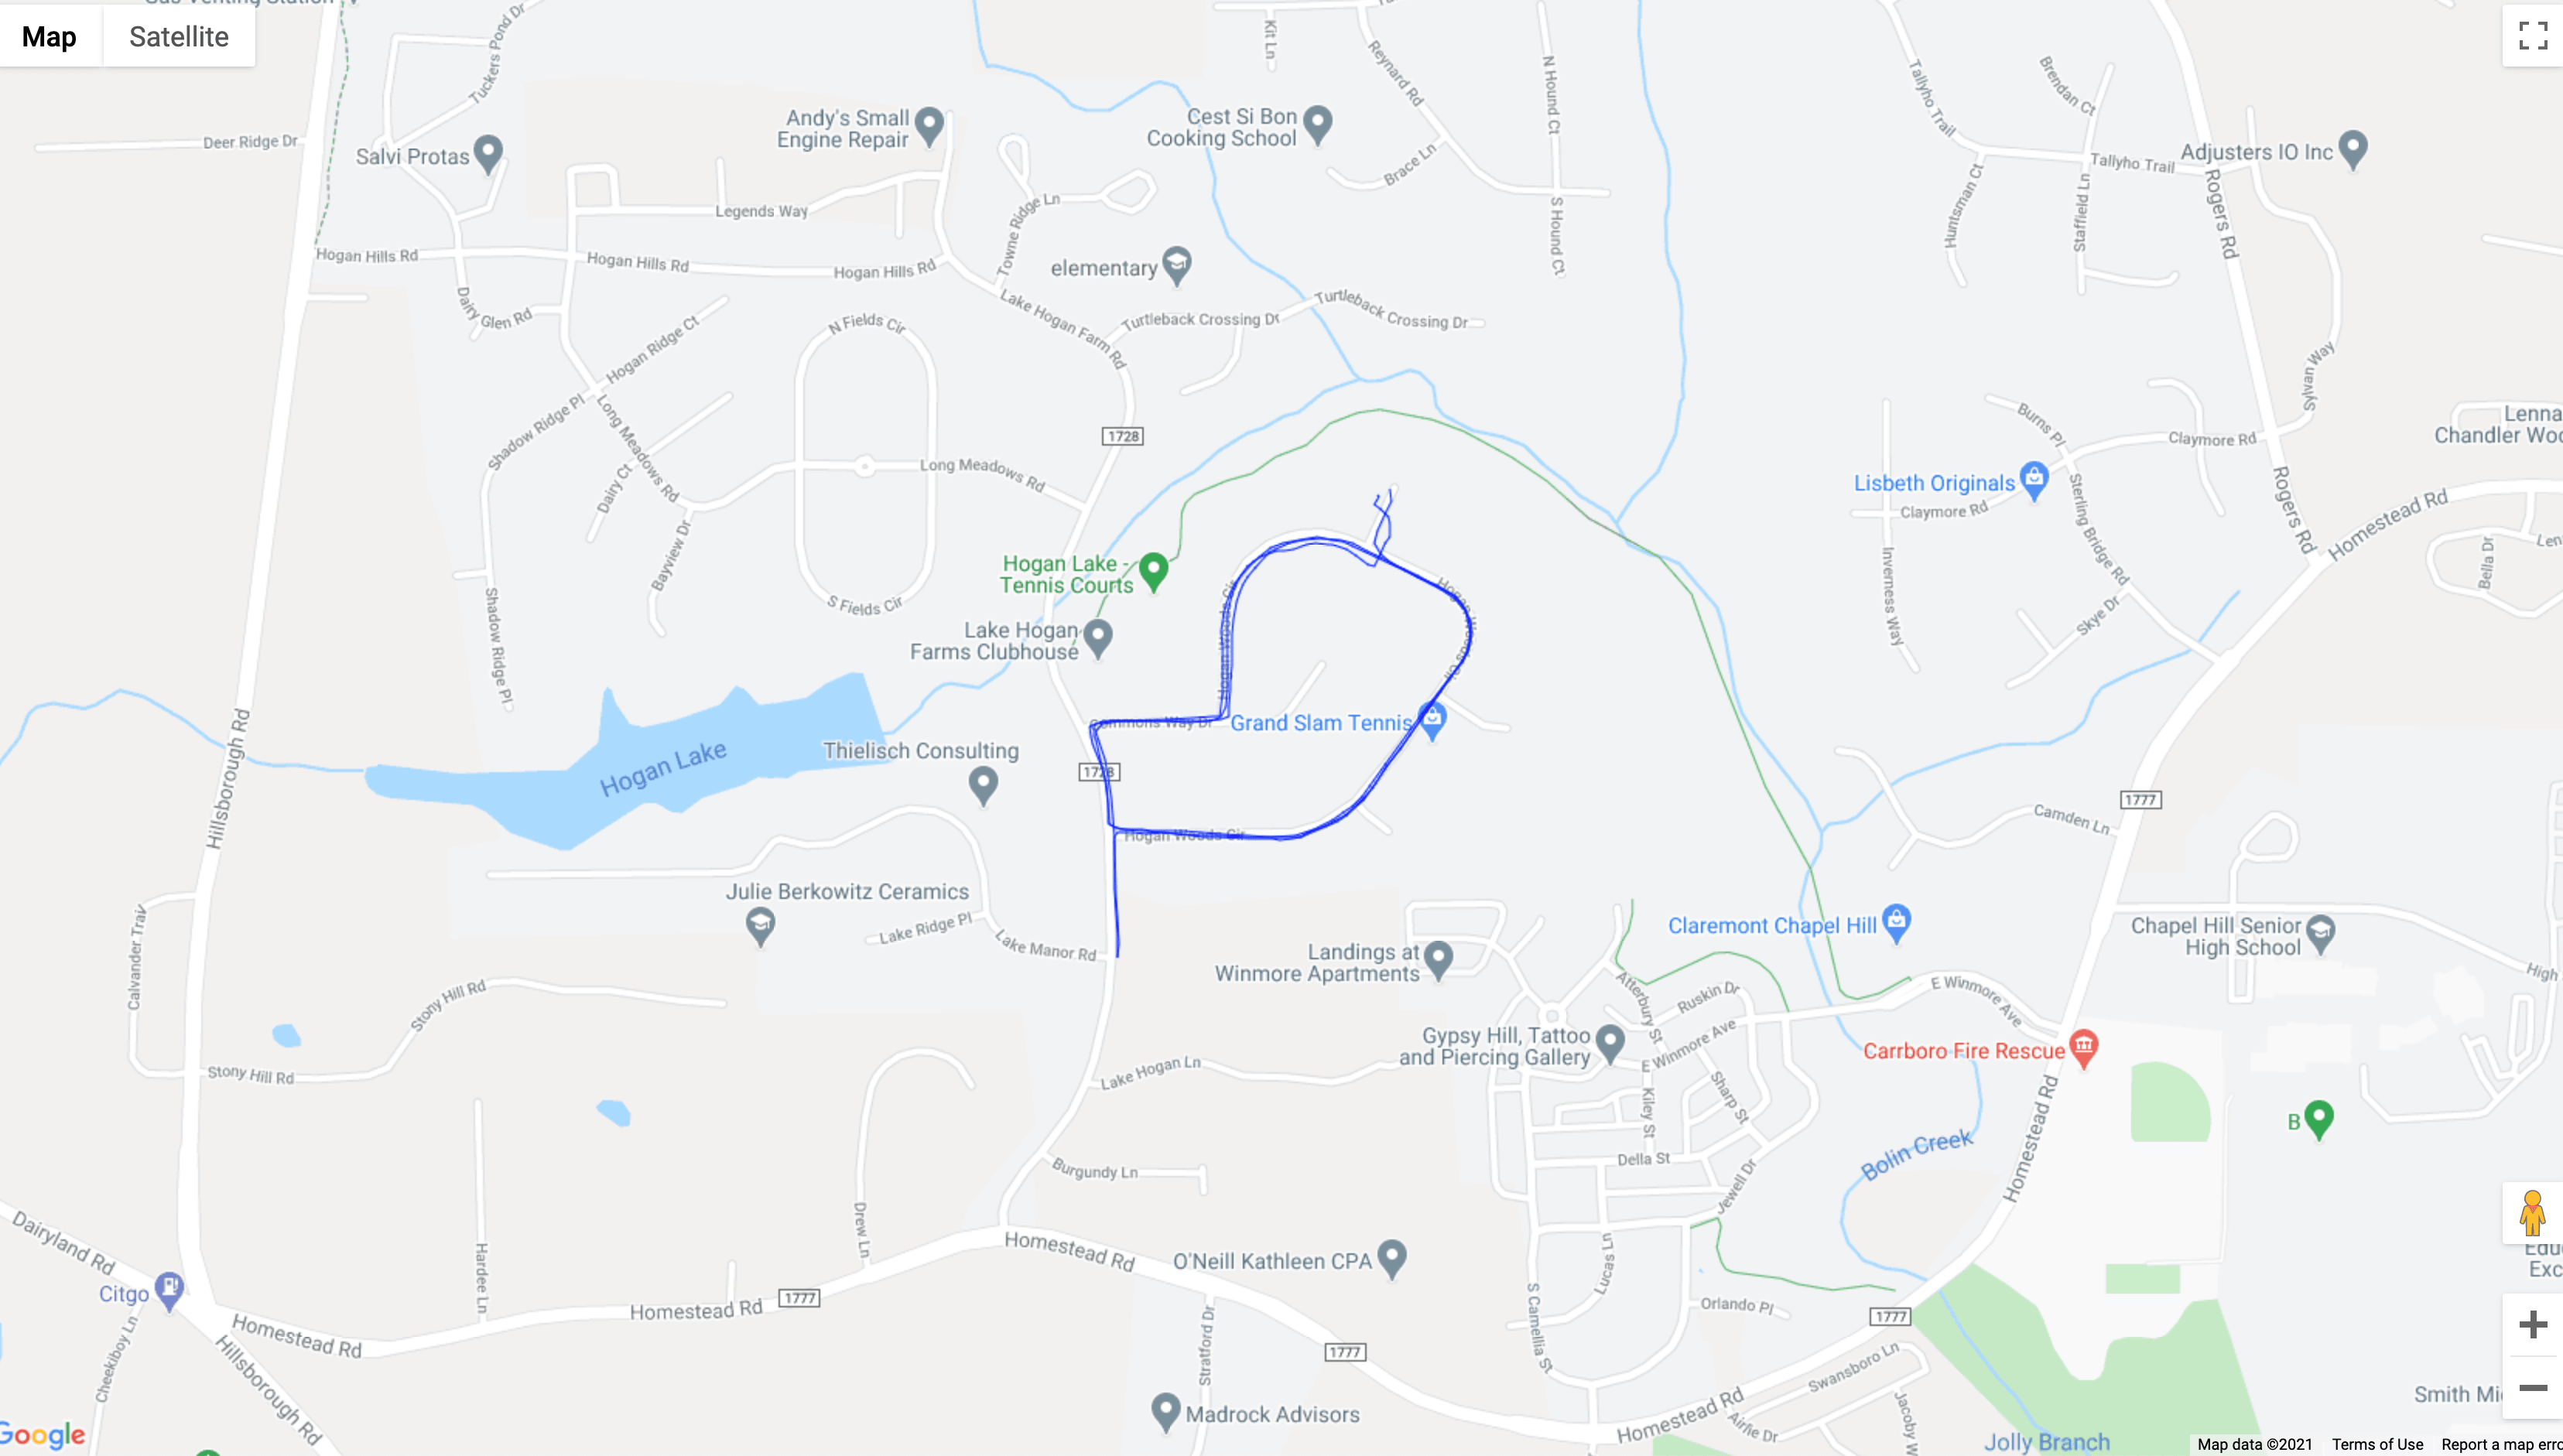

In [6]:
#Show the map (here I saved the myroute.html as image for the illustration purposes)
import IPython
IPython.display.Image(filename='images/myroute-min.png')